In [41]:
import pandas as pd
from datetime import time, timedelta
import matplotlib.pyplot as plt

# Read your data
df = pd.read_csv("./17.01 UPMC Demo/soln3Times.csv", index_col=0)

In [42]:
doctor_dfs = {}

# Function to convert minutes from start to actual time
def minutes_to_time(minutes):
    start_hour = 8  # 8 AM
    total_minutes = start_hour * 60 + minutes
    hours = (total_minutes // 60) % 24
    mins = total_minutes % 60
    return time(hours, mins)

# Split into 8 dataframes (one per doctor/machine)
for doctor_num in range(8):
    doctor_df = df[df['machine'] == doctor_num].copy()
    
    # Select and rename columns
    doctor_df = doctor_df[['job_id', 'start_time', 'end_time', 'processing_time', 'arrival_time']]
    doctor_df = doctor_df.rename(columns={'job_id': 'patient_id'})
    
    # Convert times to actual clock times
    doctor_df['start_time'] = doctor_df['start_time'].apply(minutes_to_time)
    doctor_df['end_time'] = doctor_df['end_time'].apply(minutes_to_time)
    doctor_df['arrival_time'] = doctor_df['arrival_time'].apply(minutes_to_time)
    
    # Sort by start time
    doctor_df = doctor_df.sort_values('start_time').reset_index(drop=True)
    
    # Store in dictionary with doctor number as key
    doctor_dfs[doctor_num] = doctor_df


In [43]:
# Access individual doctor schedules:
# doctor_dfs[0] for Doctor 0
# doctor_dfs[1] for Doctor 1, etc.
df = doctor_dfs[3]
df

,patient_id,start_time,end_time,processing_time,arrival_time
0,15,08:01:00,08:31:00,30,08:01:00
1,1,08:31:00,09:01:00,30,08:01:00
2,23,09:01:00,09:16:00,15,08:45:00
3,44,09:30:00,10:00:00,30,09:30:00
4,79,10:15:00,10:30:00,15,10:15:00
5,74,10:30:00,10:45:00,15,10:15:00
6,78,10:45:00,10:50:00,5,10:15:00
7,92,10:50:00,11:20:00,30,10:50:00
8,86,11:20:00,11:25:00,5,10:50:00
9,99,11:25:00,11:55:00,30,10:50:00


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates

# Convert time strings to datetime for plotting
#df['start_time'] = pd.to_datetime(df['start_time'])
#df['end_time'] = pd.to_datetime(df['end_time'])

# Assign machines (example: round-robin by patient_id)
df['machine'] = 3

# Optional: Sort by start_time for cleaner visualization
df = df.sort_values('start_time').reset_index(drop=True)

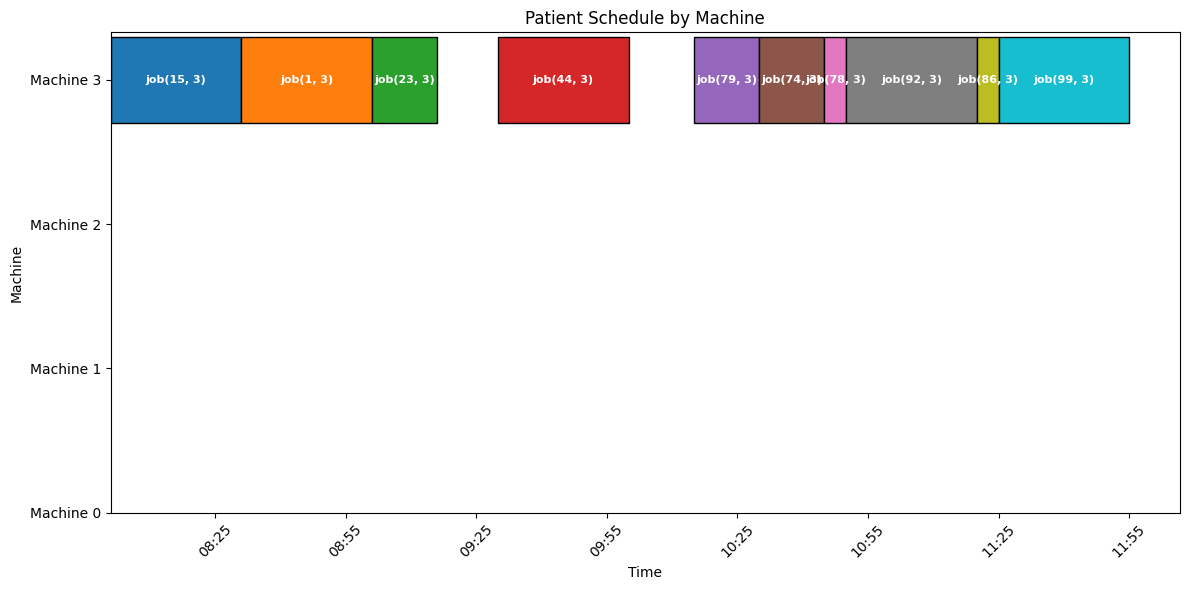

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import matplotlib.dates as mdates

# Convert time strings to datetime.time first (if they're strings)

# Add a reference date (e.g., today) to create full datetime objects
reference_date = date.today()

def time_to_datetime(t):
    return datetime.combine(reference_date, t)

df['start_dt'] = df['start_time'].apply(time_to_datetime)
df['end_dt'] = df['end_time'].apply(time_to_datetime)

# Assign machines (example: round-robin by patient_id)
df['machine'] = 3
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['lightcoral', 'lightgreen', 'lightblue']

for idx, row in df.iterrows():
    machine = row['machine']
    start = row['start_dt']
    end = row['end_dt']
    patient_id = row['patient_id']
    
    # Draw bar (width in hours for proper scaling with datetime axis)
    ax.barh(
        y=machine,
        width=(end - start),  # matplotlib handles timedelta width correctly
        left=start,
        height=0.6,
        edgecolor='black',
        linewidth=1
    )
    
    # Add label
    mid = start + (end - start) / 2
    ax.text(mid, machine, f'job({patient_id}, {machine})', 
            ha='center', va='center', fontsize=8, color='white', fontweight='bold')

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Adjust interval as needed
plt.xticks(rotation=45)

# Set y-axis
machine_labels = [f'Machine {i}' for i in range(df['machine'].max() + 1)]
ax.set_yticks(range(len(machine_labels)))
ax.set_yticklabels(machine_labels)

ax.set_xlabel("Time")
ax.set_ylabel("Machine")
ax.set_title("Patient Schedule by Machine")
plt.tight_layout()
plt.show()